In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import re
import seaborn as sns
import warnings
import pickle

warnings.filterwarnings('ignore')

font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [66]:
def reset_data(file):
    pop = pd.read_csv(file, sep=',')
    pop.drop('여자70세이상생활인구수', axis=1, inplace=True)

    pop.columns = ['시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수']

    col = pop.columns.to_list()
    col_list = ['기준일ID']

    col_list += col

    pop.reset_index(inplace=True)
    pop.columns = col_list

    pop.to_csv(file, sep=',', index=False)

In [67]:
# for i in range(1, 12):
#     reset_data('./data_missing/LOCAL_PEOPLE_DONG_2021' + str(i).zfill(2) + '.csv')
# reset_data('./data_missing/LOCAL_PEOPLE_DONG_202012.csv')

In [68]:
df1 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202101.csv', sep=',')
df2 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202102.csv', sep=',')
df3 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202103.csv', sep=',')
df4 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202104.csv', sep=',')
df5 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202105.csv', sep=',')
df6 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202106.csv', sep=',')
df7 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202107.csv', sep=',')
df8 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202108.csv', sep=',')
df9 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202109.csv', sep=',')
df10 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202110.csv', sep=',')
df11 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202111.csv', sep=',')
df12 = pd.read_csv('./data_missing/LOCAL_PEOPLE_DONG_202012.csv', sep=',')

In [69]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

In [70]:
df['시군구코드'] = df['행정동코드'].apply(lambda x: str(x)[:5])

In [71]:
pd.set_option('display.max_rows', 10)
df.기준일ID.value_counts()

20210101    10176
20210909    10176
20210907    10176
20210906    10176
20210905    10176
            ...  
20210501    10176
20210430    10176
20210429    10176
20210428    10176
20201231    10176
Name: 기준일ID, Length: 365, dtype: int64

In [72]:
df['dt'] = pd.to_datetime(df['기준일ID'], format='%Y%m%d')

In [73]:
df['day'] = df['dt'].apply(lambda x: x.weekday())

In [74]:
mapping = {'11110': '종로구', '11140': '중구', '11170': '용산구', '11200': '성동구', '11215': '광진구',
           '11230': '동대문구', '11260': '중랑구', '11290': '성북구', '11305': '강북구', '11320': '도봉구',
           '11350': '노원구', '11380': '은평구', '11410': '서대문구', '11440': '마포구', '11470': '양천구',
           '11500': '강서구', '11530': '구로구', '11545': '금천구', '11560': '영등포구', '11590': '동작구',
           '11620': '관악구', '11650': '서초구', '11680': '강남구', '11710': '송파구', '11740': '강동구'}

In [75]:
df['자치구'] = df['시군구코드'].map(mapping)

In [76]:
with open('./result/mapping.pkl', 'rb') as f:
    map_data = pickle.load(f)

In [77]:
df['행정동코드'] = df['행정동코드'].astype(str)
df['행정동'] = df['행정동코드'].map(map_data)

In [78]:
df.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,시군구코드,dt,day,자치구,행정동
0,20210101,0,11110515,14473.8890,504.7535,321.6298,474.2765,624.4867,507.3616,405.9607,...,609.6886,590.1671,422.7630,339.8220,1138.9208,11110,2021-01-01,4,종로구,청운효자동
1,20210101,0,11110530,13299.5313,364.9421,162.1967,254.0620,318.9359,449.9919,419.8851,...,522.3540,543.4003,447.2674,363.1686,1138.6352,11110,2021-01-01,4,종로구,사직동
2,20210101,0,11110550,15518.3772,418.3329,324.3693,380.5245,529.5754,470.6277,415.8823,...,692.5841,693.3884,630.9412,421.9502,1456.3029,11110,2021-01-01,4,종로구,부암동
3,20210101,0,11110600,5108.9481,122.7939,86.6778,90.4754,203.9829,137.2541,124.3374,...,247.4089,227.3631,163.6567,135.4872,406.3143,11110,2021-01-01,4,종로구,가회동
4,20210101,0,11110700,7907.7246,224.1087,106.2126,153.8756,194.7256,272.8423,315.6010,...,370.3215,377.7498,258.4794,213.1911,532.8069,11110,2021-01-01,4,종로구,숭인1동


In [79]:
df['10세미만생활인구'] = df['남자0세부터9세생활인구수'] + df['여자0세부터9세생활인구수']

In [80]:
df_g = df.groupby(['day', '시간대구분', '자치구', '행정동'])[['총생활인구수', '10세미만생활인구']].mean()

In [81]:
df_g.reset_index(inplace=True)

In [82]:
df_g

,day,시간대구분,자치구,행정동,총생활인구수,10세미만생활인구
0,0,0,강남구,개포1동,10086.298988,787.579000
1,0,0,강남구,개포2동,21272.366871,1347.019477
2,0,0,강남구,개포4동,18862.148160,1209.285902
3,0,0,강남구,논현1동,32288.635854,923.326242
4,0,0,강남구,논현2동,30004.114223,1872.658740
...,...,...,...,...,...,...
71227,6,23,중랑구,상봉2동,23536.601938,916.283992
71228,6,23,중랑구,신내1동,37777.444504,4180.144410
71229,6,23,중랑구,신내2동,19976.098658,1350.212537
71230,6,23,중랑구,중화1동,19913.866288,1628.731527


In [83]:
df_g.to_csv('./result/생활인구 연평균.csv', index=False)

In [84]:
시군구_요일별 = df_g.groupby(['자치구', 'day'])[['총생활인구수', '10세미만생활인구']].mean().reset_index()

In [85]:
시군구_요일별.to_csv('./result/자치구 요일별 총생활인구_test.csv', sep=',', index=False)

In [90]:
data_day = data.groupby(['자치구', '행정동', 'day'])[['총생활인구수', '10세미만생활인구']].mean().reset_index()

In [93]:
관악구 = 시군구_요일별[시군구_요일별['자치구'] == '관악구']

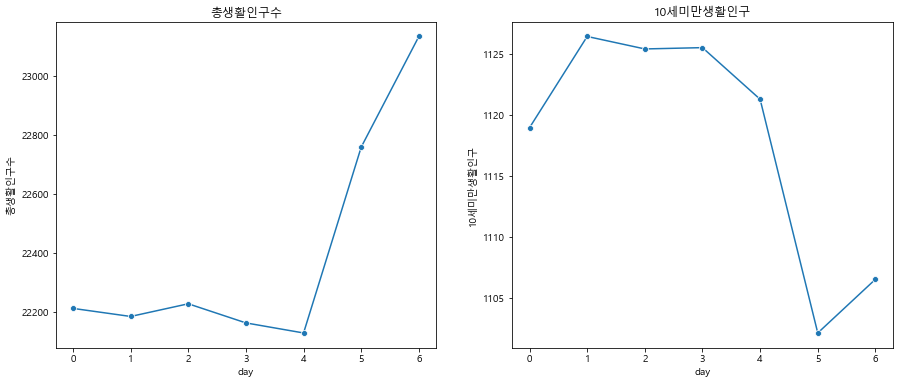

In [94]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
sns.lineplot(x='day', y='총생활인구수', data=관악구, marker='o', ax = axes[0])
sns.lineplot(x='day', y='10세미만생활인구', data=관악구, marker='o', ax = axes[1])
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.savefig('./result/관악구 요일별 생활인구.png')
plt.show()

In [95]:
data_time = data.groupby(['자치구', '시간대구분'])[['총생활인구수', '10세미만생활인구']].mean().reset_index()

In [96]:
관악구 = data_time[data_time['자치구'] == '관악구']

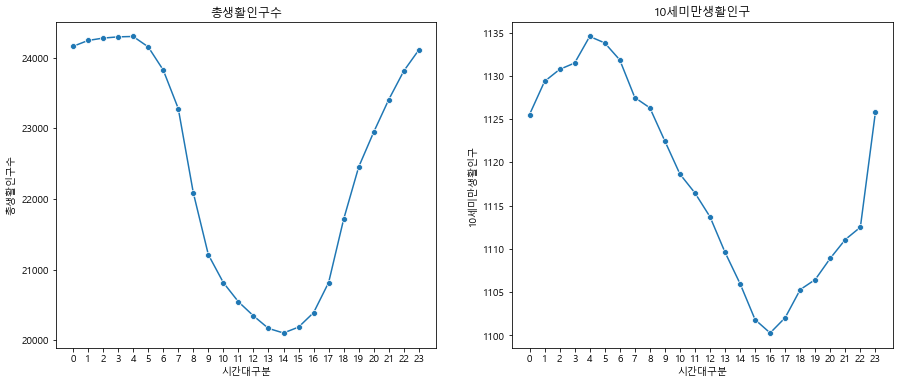

In [99]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
g = sns.lineplot(x='시간대구분', y='총생활인구수', data=관악구, marker='o', ax = axes[0])
h = sns.lineplot(x='시간대구분', y='10세미만생활인구', data=관악구, marker='o', ax = axes[1])
g.set_xticks(range(24))
h.set_xticks(range(24))
axes[0].set_title('총생활인구수')
axes[1].set_title('10세미만생활인구')
plt.savefig('./result/관악구 시간대별 생활인구.png')
plt.show()